# **Model Notebook**

This is the notebook for model in age and gender detector. Here, we will extract the data, train it and fit it into aur model, and will evaluate our results and optimize the model for better results. 

## Importing the Necessary libraries

In [1]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dense, MaxPooling2D, Conv2D
from keras.models import Model
from keras.layers import Input, Activation, Add
from keras.regularizers import l2
from keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop

## Extract data from the dataset

If data has not been doenloaded yet, download it from [Here](https://www.kaggle.com/jangedoo/utkface-new) 

In [2]:
path = "./UTKFace"

In [3]:
import os
files = os.listdir(path)

### Create List of images from the dataset

In [4]:
ages = []
genders = []
images = []

for file in files:
    age = int(file.split('_')[0])
    gender = int(file.split('_')[1])
    total = path + '/' + file
    print(total)
    image = cv2.imread(total)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48,48))
    images.append(image)

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

### Create List of Age and Gender from the dataset*

In [5]:
for file in files:
    age = int(file.split('_')[0])
    gender = int(file.split('_')[1])
    ages.append(age)
    genders.append(gender)

### Viewing a sample

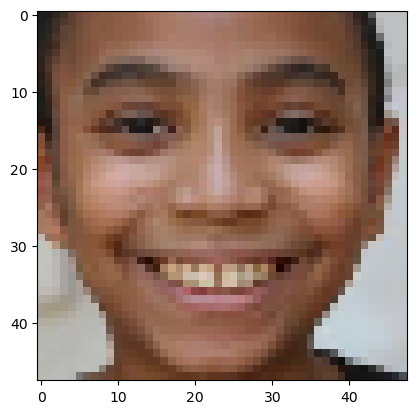

In [6]:
plt.imshow(images[87])

In [7]:
ages[87]

10

In [8]:
print(genders[87])

0


### Saving images array, ages array, and genders array in the system

In [9]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [10]:
np.save(path + 'image.npy', images_f)
np.save(path + 'ages.npy', ages_f)
np.save(path + 'genders.npy', genders_f)

### Finding the no. of Male and Female samples respectively

In [11]:
values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


### Plotting the no. of Male and Female samples

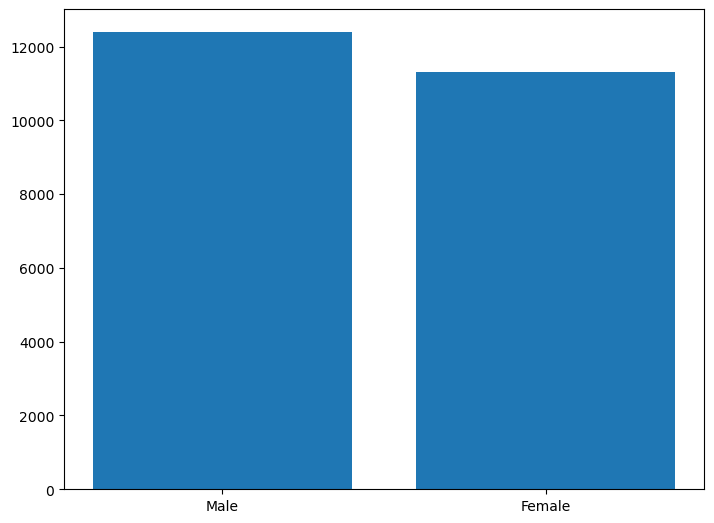

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender =['Male', 'Female']
values = [12391, 11317]
ax.bar(gender, values)
plt.show()

### Finding the no. of samples in each age

In [13]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


### Converting Age counts to lists

In [14]:
val = values.tolist()
cnt = counts.tolist()

### Plotting the samples Agewise

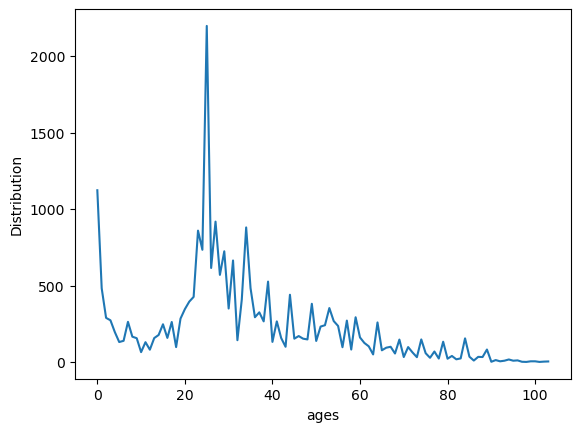

In [15]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('Distribution')
plt.show()

### Defining labels for output

In [16]:
labels = []
i = 0

while i < len(ages):
    label = []
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i += 1

### Creating another list of images from existing one

#### For better learning

In [17]:
images_f_2 = images_f / 255

In [18]:
images_f_2.shape

(23708, 48, 48, 3)

In [19]:
labels_f = np.array(labels)

### Splitting the Dataset into test and train

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_f, test_size=0.25)

In [22]:
Y_train[0:5]

array([[41,  0],
       [49,  1],
       [ 1,  0],
       [21,  1],
       [53,  0]])

### Splitting the 'Y_test' and 'Y_train' further

For better understanding

In [23]:
Y_train_2 = [Y_train[:,1], Y_train[:,0]]
Y_test_2 = [Y_test[:,1], Y_test[:,0]]

In [24]:
Y_train_2[0][0:5]

array([0, 1, 0, 1, 0])

In [25]:
Y_train_2[1][0:5]

array([41, 49,  1, 21, 53])

## Defining the Model

In [26]:
def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3,3), padding='same', strides=(1,1), kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [27]:
def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Convolution(inputs, 32)
    maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2 = Convolution(maxp_1, 64)
    maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3 = Convolution(maxp_2, 128)
    maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4 = Convolution(maxp_3, 256)
    maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)
    conv_5 = Convolution(maxp_4, 512)
    maxp_5 = MaxPooling2D(pool_size=(2,2))(conv_5)
    flatten = Flatten()(maxp_5)
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)
    model = Model(inputs=[inputs], outputs=[output_1, output_2])
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer='Adam', metrics=['accuracy'])
    return model

In [28]:
Model = model((48, 48, 3))

In [29]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 32)   896         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 48, 48, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 48, 48, 32)   0           ['dropout[0][0]']                
                                                                                              

                                                                                                  
 conv2d_4 (Conv2D)              (None, 3, 3, 512)    1180160     ['max_pooling2d_3[0][0]']        
                                                                                                  
 dropout_4 (Dropout)            (None, 3, 3, 512)    0           ['conv2d_4[0][0]']               
                                                                                                  
 activation_4 (Activation)      (None, 3, 3, 512)    0           ['dropout_4[0][0]']              
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 1, 1, 512)   0           ['activation_4[0][0]']           
                                                                                                  
 flatten (Flatten)              (None, 512)          0           ['max_pooling2d_4[0][0]']        
          

### Initializing the Model

In [30]:
from keras.callbacks import ModelCheckpoint

In [31]:
file_name = 'Age_Sex_Detection.h5'
checkpoint = ModelCheckpoint(file_name, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience=25, monitor='val_loss', restore_best_weights='True')
callback_list = [checkpoint, Early_stop]

### Running the Model

In [32]:
History = Model.fit(X_train, Y_train_2, batch_size=64, validation_data=(X_test, Y_test_2), epochs=250, callbacks=callback_list)

Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 16.6570 - sex_out_loss: 0.7041 - age_out_loss: 15.6670 - sex_out_accuracy: 0.5200 - age_out_accuracy: 0.0470
Epoch 1: val_loss improved from inf to 16.62506, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 279s 896ms/step - loss: 16.6570 - sex_out_loss: 0.7041 - age_out_loss: 15.6670 - sex_out_accuracy: 0.5200 - age_out_accuracy: 0.0470 - val_loss: 16.6251 - val_sex_out_loss: 0.6895 - val_age_out_loss: 15.6921 - val_sex_out_accuracy: 0.5222 - val_age_out_accuracy: 0.0483
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 13.5296 - sex_out_loss: 0.6540 - age_out_loss: 12.5788 - sex_out_accuracy: 0.6188 - age_out_accuracy: 0.0457
Epoch 2: val_loss improved from 16.62506 to 15.32197, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 246s 883ms/step - loss: 13.5296 - sex_out_loss: 0.6540 - age_out_loss: 12.5788 - sex_out_accuracy: 0.6188 -

### Model Evaluation

In [33]:
Model.evaluate(X_test, Y_test_2)

186/186 [==============================] - 9s 49ms/step - loss: 7.3912 - sex_out_loss: 0.2365 - age_out_loss: 6.3120 - sex_out_accuracy: 0.8961 - age_out_accuracy: 0.0483


[7.391168117523193,
 0.23648737370967865,
 6.31196403503418,
 0.896068811416626,
 0.048253752291202545]

In [34]:
pred = Model.predict(X_test)

186/186 [==============================] - 22s 43ms/step


In [35]:
pred[1]

array([[28.26902  ],
       [27.729683 ],
       [33.255016 ],
       ...,
       [44.369064 ],
       [19.953545 ],
       [ 1.1249294]], dtype=float32)

### Plotting Loss

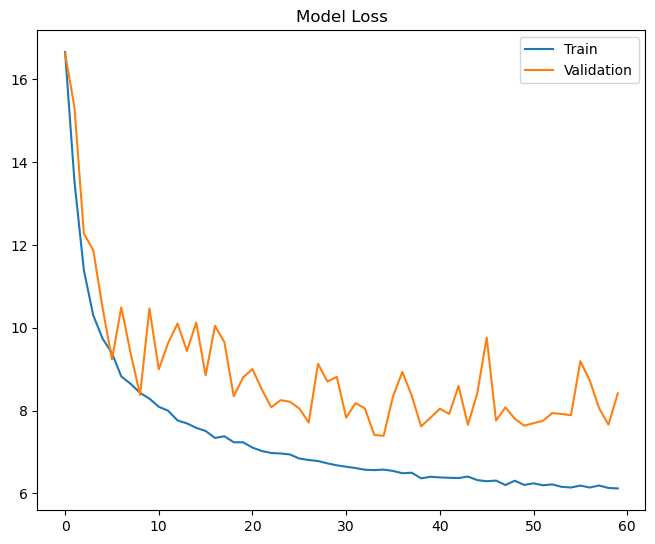

In [36]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)

### Plotting Sex Accuracy

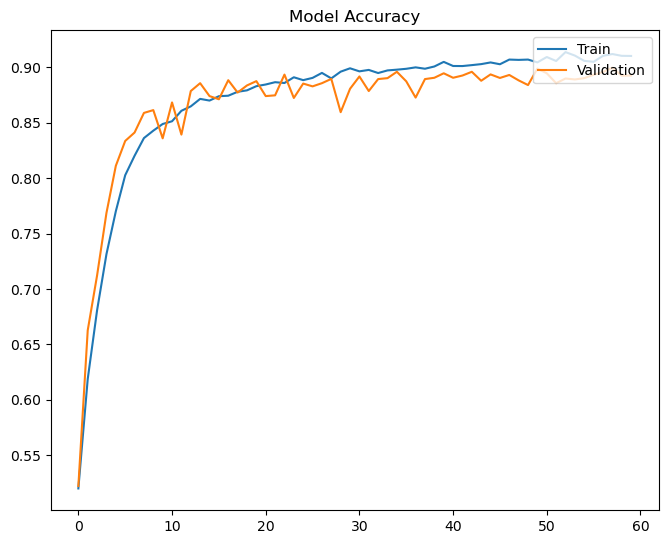

In [37]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)

### Plotting Age Accuracy

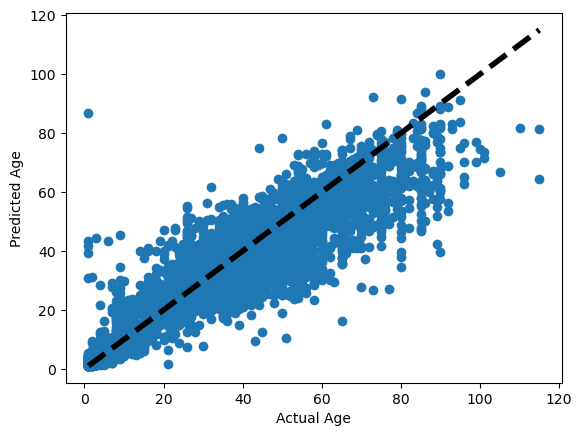

In [38]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(), Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

### Making report of the Model (Gender only)

In [39]:
i = 0
pred_l = []

while(i < len(pred[0])):
    pred_l.append(int(np.round(pred[0][i])))
    i += 1

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [41]:
report  = classification_report(Y_test_2[0], pred_l)

In [42]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3094
           1       0.89      0.89      0.89      2833

    accuracy                           0.90      5927
   macro avg       0.90      0.90      0.90      5927
weighted avg       0.90      0.90      0.90      5927



### Making Heatmap of the Model (Gender only)

In [43]:
results = confusion_matrix(Y_test_2[0], pred_l)

<AxesSubplot:>

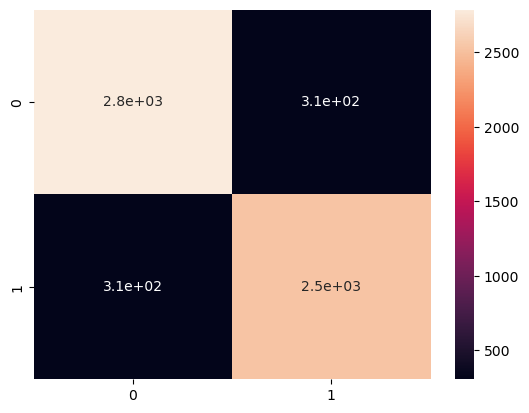

In [44]:
import seaborn as sns
sns.heatmap(results, annot=True)

## Testing the images ourself

In [45]:
def test_image(ind, images_f, images_f_2, Model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    pred_l = Model.predict(np.array([image_test]))
    sex_f = ['Male', 'Female']
    age = int(np.round(pred_l[1][0]))
    sex = int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

#### Test 1

1/1 [==============================] - 0s 62ms/step
Predicted Age is 93
Predicted Gender is Female


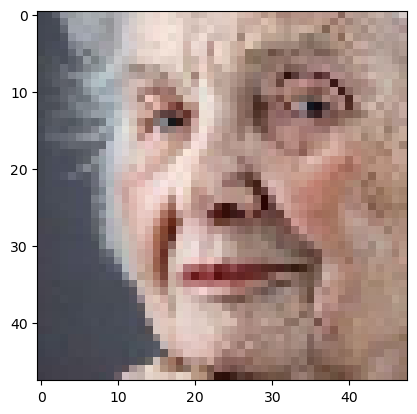

In [46]:
test_image(4, images_f, images_f_2, Model)

#### Test 2

1/1 [==============================] - 0s 188ms/step
Predicted Age is 8
Predicted Gender is Male


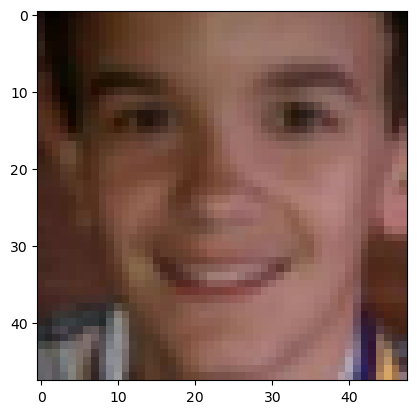

In [50]:
test_image(23, images_f, images_f_2, Model)

#### Test 3

1/1 [==============================] - 0s 31ms/step
Predicted Age is 13
Predicted Gender is Female


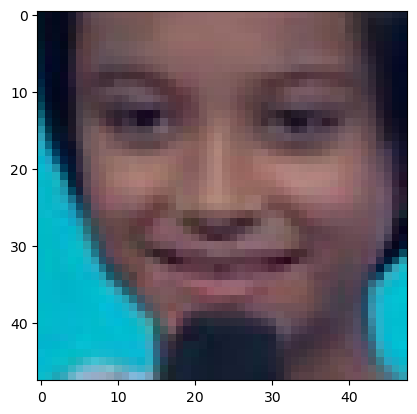

In [47]:
test_image(168, images_f, images_f_2, Model)

#### Test 4

1/1 [==============================] - 3s 3s/step
Predicted Age is 40
Predicted Gender is Male


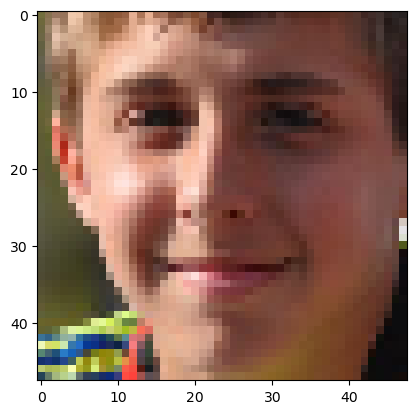

In [51]:
test_image(888, images_f, images_f_2, Model)

#### Test 5

1/1 [==============================] - 0s 37ms/step
Predicted Age is 32
Predicted Gender is Female


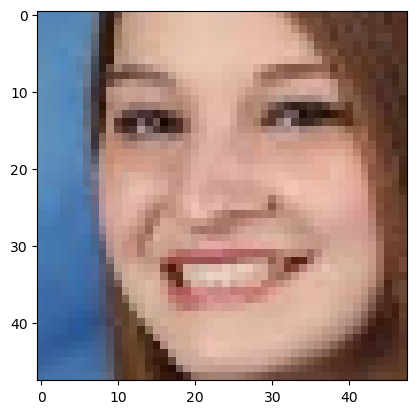

In [49]:
test_image(1288, images_f, images_f_2, Model)